In [75]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
df.shape

(569, 32)

In [77]:
from sklearn.preprocessing import LabelEncoder

X=df.loc[:,2:].values
y=df.loc[:,1].values
le=LabelEncoder()
y=le.fit_transform(y)

In [78]:
le.transform(['M','B'])

array([1, 0])

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

## 파이프라인으로 변환기와 추정기 연결

In [80]:
from sklearn.preprocessing import StandardScaler #정규화
from sklearn.decomposition import PCA #차원 축소
from sklearn.linear_model import LogisticRegression #로지스틱회귀
from sklearn.pipeline import make_pipeline # 파이프라인

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

#변환기->추정기()
pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)

print(pipe_lr.score(X_test,y_test))

0.956140350877193


## k-fold 교차 검증

1.홀드아웃방법은 훈련데이터와 테스트데이터로 나누고 훈련데이터는 모델학습/테스트데이터는 일반화 성능을 추정하는데 사용합니다.
2.훈련데이터,검증데이터,테스트데이터 훈련데이터는 여러가지모델 훈련 합니다 검증데이터의 모델 선택사용합니다 테스트데이터로 모델 정확도 확인

In [81]:
from IPython.display import Image


In [82]:
Image(url='https://git.io/JtsTo', width=500) 

## k-겹 교차검증

In [83]:
Image(url='https://git.io/JtsT6', width=500) 

k-겹 k개의 데이터의를 분리하여 k-1개의 훈련데이터를 뽑고 1개의 테스트하고 k개번의 테스트를 실행합니다.k=10이여서 기본값입니다. 적은 훈련 데이터셋으로 작업한다면 폴드개수 늘리는것이 좋습니다.k값이 증가면 더많은 훈련데이터가 각 반복에 사용되고 모델성능 평균하여 일반화 하여 추정합니다.k값이 아주크면 실행이 늘어나고 분산이 높은 추정 만듭니다. 

계층적 k-겹 교차검증 클래스비율이 전체 클래스 비율을 대표하도록 유지한다.사이킷런의 sklearn.straytfieKFold=5/stratfiedKfold반복자를 사용하여 예시 생성


In [84]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10).split(X_train,y_train)
scores=[]
for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train],y_train[train])
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)
    print(np.bincount(y_train[train]),score)
print(np.mean(scores),np.std(scores))

[256 153] 0.9347826086956522
[256 153] 0.9347826086956522
[256 153] 0.9565217391304348
[256 153] 0.9565217391304348
[256 153] 0.9347826086956522
[257 153] 0.9555555555555556
[257 153] 0.9777777777777777
[257 153] 0.9333333333333333
[257 153] 0.9555555555555556
[257 153] 0.9555555555555556
0.9495169082125603 0.013854294239660376


In [85]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipe_lr,X=X_train,y=y_train,cv=10)
print(scores)

[0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


cross_val_predict 함수는 cross_val_Score와 비슷한 인터페이스 제공 훈련데이터 셍의 각 샘플이 테스트 폴드 되었을때 예측반환
따라서 cross_val_predict함수결과 사용해 모델의 선능 계싼
cross_val_Score 함수의 결과와 다르면 바람직한 일반화 성능추정 아닙니다
cross_val_predict 함수의 사용 용도는 훈련세트에 대한 예측결과를 시각화

In [69]:
from sklearn.model_selection import cross_val_predict
pred=cross_val_predict(estimator=pipe_lr,X=X_train,y=y_train,cv=10)
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

method 매개변수에 반환될값을 계산하기 위한 모델의 메서드를 지정할수 있습니다
예를들어 method=predict_proba로 지정하면 예측확률 반환 predict,predict_proba,predict_logproba,decision_function 가능하며 기본은 predicr

In [101]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(estimator=pipe_lr,
                          X=X_train, 
                          y=y_train,
                          cv=10, 
                          method='predict_proba', 
                          n_jobs=-1)
preds[:10]

UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-19: ordinal not in range(128)

## 학습곡선으로 편향 분산 문제 분석

In [ ]:
Image(url='https://git.io/JtsTi', width=600) 

왼쪽의 그래프는 과소적합이고 오른쪽의 그래프는 과대적합을 나타냅니다 오른쪽 아래그래프는 최적의 상태를 의미합니다 과대적합문제를 해결하기 위해 더많은 데이터를 모으거나 규제를 증가시킬수 있습니다. 특성갯수를 줄여 과대적합을 감소할수있습니다

In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr=make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=1,max_iter=10000))
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

In [54]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)

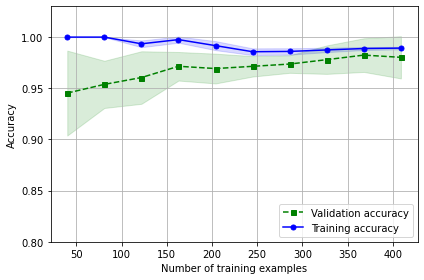

In [55]:
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

## 검증곡선으로 과대적합과 과소적합 실시

#검증곡선은 과대적합 과소적합 문제를 실시하여 모델 성능을 높일수있는 유용한도구


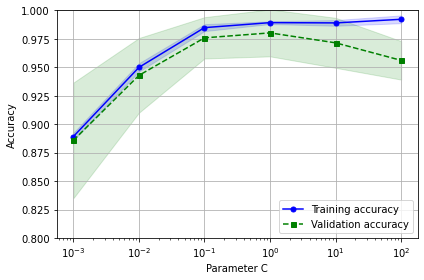

In [56]:
from sklearn.model_selection import validation_curve
param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
train_scores,test_scores=validation_curve(estimator=pipe_lr,X=X_train,y=y_train,param_name='logisticregression__C',param_range=param_range,cv=10)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

## 그리드 서치 이용한 머신러닝 모델 튜닝 

머신러닝에는 두개의 파라미터가 있는데 하나는 학습알고리즘 파라미터고 하나는 튜닝 파라미터입니다 튜닝파라미터에 따라 모델의 학습정확도가 정해지는데 이 좋은 튜닝 파라미터를 찾아주는 방법이 그리드 서치입니다

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc=make_pipeline(StandardScaler(),SVC(random_state=1))
param_range=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid=[{'svc__C':param_range,'svc__kernel':['linear']},
           {'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs=GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',refit=True,cv=10,n_jobs=-1)
gs.fit(X_train,y_train)
print(gs.best_params_)#최적의 튜닝값 출력

In [ ]:
clf=gs.best_estimator#최적의 튜닝의 추정기 선택
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))


GridSearchCV 클래스와 cross_validate 함수에서 return_train_score 매개변수를 true로 지정하면 점수를 계산하여 반환합니다.

매개변수 탐색범위가 넓거나 규제매개변수 C와 같이 연속적인 값을 탐색해야하는경우에 RandomizedSearchCV를 사용합니다
호출은 sklearn.model_selection import RandomizedSearchCV

## 중접교차 검증을 사용한 알고리즘

In [102]:
Image(url='https://git.io/JtsTP', width=500) 

In [103]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV 정확도: 0.974 +/- 0.015


In [104]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)
#
scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

CV 정확도: 0.934 +/- 0.016


## 오차행렬

오차행렬은 tp(진짜음성,tn진짜음성,fp가짜양성,fn가짜음성 이 있습니다 

In [107]:
#행렬호출
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
#총3개의 샘플을 잘못 예측하였습니다

[[71  1]
 [ 2 40]]


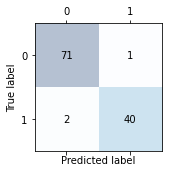

In [108]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
# plt.savefig('images/06_09.png', dpi=300)
plt.show()

이 예에서 클래스 1(악성 종양)이 양성 클래스입니다. 모델은 71개의 샘플을 정확하게 클래스 0(진짜 음성)으로 분류했습니다. 40개의 샘플은 클래스 1(진짜 양성)로 올바르게 분류했습니다. 클래스 1에 해당하는 두 개의 샘플을 클래스 0(가짜 음성)으로 잘못 분류했고 양성 종양인 하나의 샘플을 악성 종양(가짜 양성)으로 잘못 분류했습니다.

## 분류모델의 정밀도 재현율

정밀도=TPTP+FP 
재현율=TPFN+TP
F1=2×정밀도×재현율정밀도+재현율


In [111]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_true=y_test,y_pred=y_pred))
print(recall_score(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred))

0.975609756097561
0.9523809523809523
0.963855421686747


## ROC커브

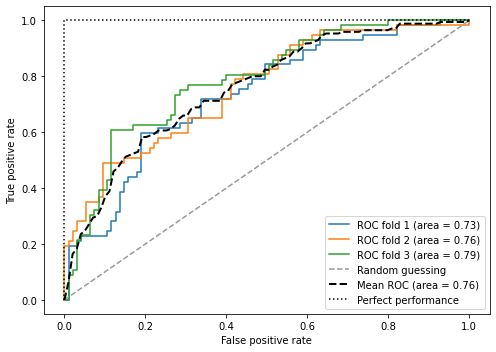

In [121]:
from sklearn.metrics import roc_curve, auc
from distutils.version import LooseVersion as Version
from scipy import __version__ as scipy_version
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           C=100.0))
if scipy_version >= Version('1.4.1'):
    from numpy import interp
else:
    from scipy import interp
X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

## 11 불균형 클래스 다루기

In [ ]:
#resample을 이용한다
from sklearn.utils import resamplee
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)
